Name: Harshita Mehta

# AIM: Predict the percentage of marks of a student based on the number of study hours.

IMPORT LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

IMPORT DATASET

In [10]:
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


SUMMARY OF DATASET

In [11]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


CHECK FOR THE NULL VALUES

In [12]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values so we can go ahead with Exploring the dataset.

Exploring the dataset

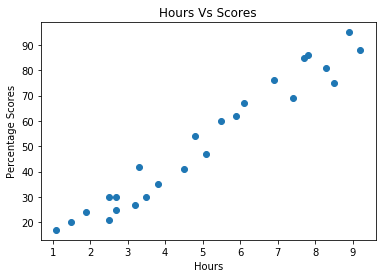

In [13]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.show()

The plot shows the relation between Hours and Percentage scores. Let's go ahead with data manipulation.

First define Dependent and Independent variables. Independent variables is the "Hours" and the Dependent variable is the "Scores".

In [14]:
x=dataset['Hours']
y=dataset['Scores']

In [15]:
x

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [16]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

Now, split the dataset into training set and testing set.

In [19]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [44]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

Fitting of model on the training dataset

In [45]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicted values of Scores for the training dataset

In [46]:
predicted_values=linreg.predict(x_train)

Plot the training dataset

Plot the scatter plot for the tarining values given and plot the predicted value points on it

Text(0, 0.5, 'Percentage Scores')

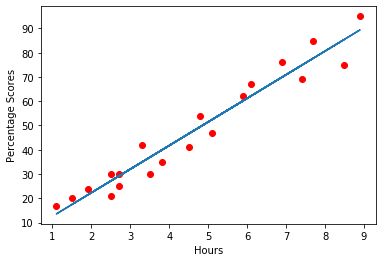

In [47]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,predicted_values)
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")

Now, calculate the coefficients of the Linear Regression line

In [48]:
bo=print(linreg.intercept_)
b1=print(linreg.coef_)

2.8720259997897557
[9.72135246]


So, as we can see the line of Regression is 1.7064 + 9.935*x

Now, Predict the values of y for the testing dataset.

In [49]:
predicted_values_test=linreg.predict(x_test)

In [50]:
predicted_values_test

array([92.30846867, 56.33946455, 78.69857522, 83.55925145, 33.98035389])

Now, compare the given values with the predicted values for the testing dataset

In [51]:
compare=pd.DataFrame({'GIVEN': y_test,'PREDICTED':predicted_values_test })

In [52]:
compare

,GIVEN,PREDICTED
0,88,92.308469
1,60,56.339465
2,86,78.698575
3,81,83.559251
4,27,33.980354


Visualization for the Best Fit

Text(0, 0.5, 'Percentage Scores')

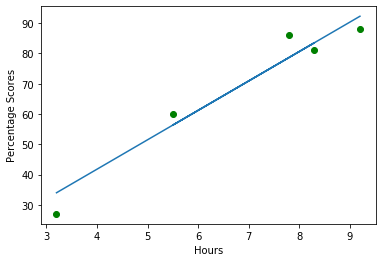

In [53]:
plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,predicted_values_test)
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")

Calculate the Mean Square Error for the dataset

In [54]:
MSE=mean_squared_error(y_test,predicted_values_test)
print("MSE =", MSE)

MSE = 28.109666843516617


The predicted value of 'Scores' if the student studies for 9.25 hrs.

In [57]:
hours=9.25
score=linreg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score))

No of Hours = 9.25
Predicted Score = [92.7945363]
